# social.coop Notebook

## Registrations

Whenever someone registers for a new account at https://wiki.social.coop/registration-form.html a Gitlab issue is automatically created for someone from the community working group to process. Since each issue has a `created_time` we can take a quick look at social.coop registrations over time. I guess this information is also in the Mastodon database itself...

To run this notebook you'll need to install a few things:

```
pip install -r requirements.txt
```

Then you'll need to add a `.env` file that contains your GitLab API token:

```
GITLAB_TOKEN=YOURTOKENHERE
```

Then you can run this code to fetch the issues from the (private) [community-operations](https://git.coop/social.coop/community/operations/-/issues) repository:

In [6]:
import os
import json
import time
import dotenv
import requests

dotenv.load_dotenv()

token = os.environ.get('GITLAB_TOKEN')

page = 1
issues = []
while True:
    resp = requests.get("https://git.coop/api/v4/projects/764/issues", headers={"PRIVATE-TOKEN": token}, params={"page": page, "per_page": 100})
    results = resp.json()

    if len(results) == 0:
        break

    issues.extend(results)
    time.sleep(.5)
    page += 1

json.dump(issues, open("data/issues.json", "w"), indent=2)


Now you can load in the issues data into a Pandas DataFrame, and extract out just the issues that are related to new registrations. These issues are created automatically by the registration process.

In [9]:
import pandas

df = pandas.read_json('issues.json', convert_dates=True)
df = df[df.title.str.match('social.coop registration')]
df = df.set_index('created_at')


Now we can resample the created_at index grouping by week:

In [11]:
counts = df.resample('W').count()
counts.head()

,id,iid,project_id,title,description,state,updated_at,closed_at,closed_by,labels,...,issue_type,web_url,time_stats,task_completion_status,has_tasks,_links,references,severity,moved_to_id,service_desk_reply_to
created_at,,,,,,,,,,,,,,,,,,,,,
2021-02-28 00:00:00+00:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2021-03-07 00:00:00+00:00,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,0,0
2021-03-14 00:00:00+00:00,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,0,0
2021-03-21 00:00:00+00:00,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,0
2021-03-28 00:00:00+00:00,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,0,0


And graph it!

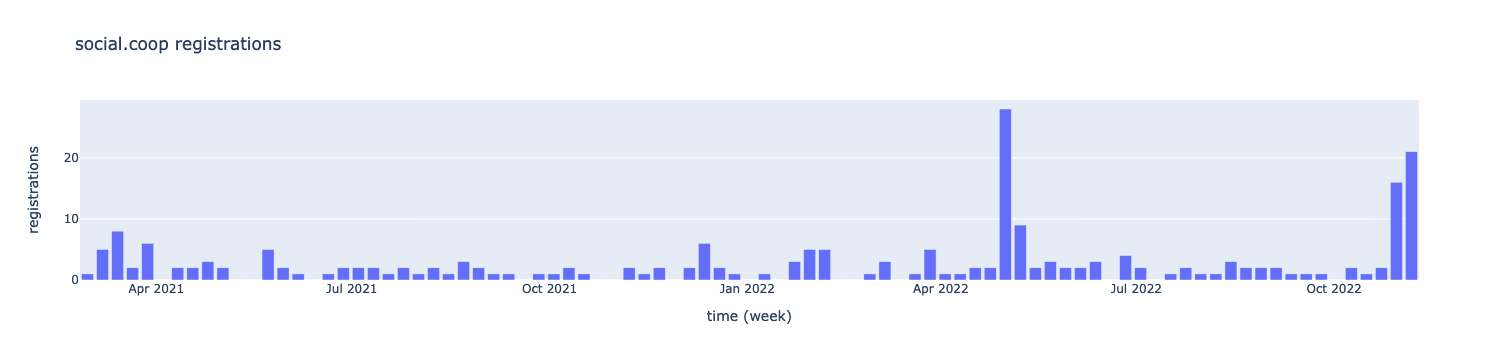

In [13]:
import plotly.express as xp

xp.bar(counts, x=counts.index, y=counts.id, title='social.coop registrations', labels={'id': 'registrations', 'created_at': 'time (week)'})
